In [1]:
# Import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import json
import seaborn as sns
import re
import statistics
import sqldf

%matplotlib inline 

* **IMPORTANT** There is a readme within the excel files
* Excel has multiple tabs. 'UPT' is the 'Unlinked Passenger Trips'
* 'Unlinked Passenger Trips' is defined as "..total boardings on an individual vehicle."

In [2]:
og_upt_df = pd.read_excel('../data/public transportation/public_transport_data.xlsx', sheet_name = 'UPT', nrows=2225)

C:\Users\tye64\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
og_year_upt_df = pd.read_excel('../data/public transportation/public_transport_data.xlsx', sheet_name = 'Calendar_Year_UPT', nrows=2225)

In [4]:
og_year_upt_df

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,TOS,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021 Through April
0,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",DR,PT,1616625,...,1119392,1103355,1012714,902626,870776,854155,883312,887915,455391,131615
1,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",DR,TX,0,...,76736,86383,96244,110018,110665,103861,143747,177791,86460,24327
2,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",FB,DO,0,...,0,0,0,0,601942,599954,664365,701608,146930,30834
3,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",LR,DO,357935,...,0,0,0,0,0,0,0,0,0,0
4,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",MB,DO,70032459,...,94652420,97702518,99570061,101362882,100924131,101129569,103435175,103527532,48865810,11668541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,99423,NaN,City of Glendale,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",MB,PT,0,...,0,0,0,930377,1738122,1637300,1431136,1414940,553889,123060
2221,99424,NaN,City of Pasadena,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",DR,PT,0,...,0,0,0,0,0,38773,86218,90957,38717,6746
2222,99424,NaN,City of Pasadena,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",MB,PT,0,...,0,0,0,0,0,781755,1508413,1526844,957116,216266
2223,99425,NaN,Pomona Valley Transportation Authority,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",DR,PT,0,...,0,0,0,50926,99135,91053,84088,84110,30628,3671


In [5]:
nash_year_upt = og_year_upt_df[og_upt_df['UZA Name'].str.contains('Nashville')]
nash_year_upt

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,TOS,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021 Through April
684,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",CB,DO,0,...,0,0,201349,359813,333053,160949,0,0,0,0
685,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",DR,DO,116150,...,289627,283563,314960,300945,290374,312262,313041,299585,178398,56064
686,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",DR,PT,0,...,0,0,0,0,0,0,0,0,0,0
687,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",DR,TX,0,...,97241,112972,108428,132654,156006,146927,110655,94391,51154,15092
688,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",MB,DO,6590671,...,9449084,9432768,9330265,9215774,8929525,8971288,9372784,9118379,4901327,1300872
995,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",CB,PT,0,...,139413,185394,202722,201989,191593,196108,184942,178981,56991,8970
996,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",CR,PT,0,...,264874,243496,258023,273878,283174,299112,298765,293314,77245,11087
997,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",MB,PT,0,...,0,0,0,0,0,0,0,0,0,0
998,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",VP,DO,0,...,0,0,0,0,0,0,0,0,0,0
999,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,"Nashville-Davidson, TN",VP,PT,0,...,185159,173843,176851,153928,136367,125245,119671,75901,35894,4380


In [6]:
# Going to define the modes and then join it to my other df
# https://www.transit.dot.gov/ntd/national-transit-database-ntd-glossary#O

modes = {'Mode': ['AG','AR','CB','CC','CR','DR','FB','HR','IP','LR','MB','MG','MO','OR','PB','RB','SR','TB','TR','VP','YR'],
            'Name': ['Automated Guideway','Alaska Railroad','commuter bus','cable car','commuter rail','demand response','Ferryboats','heavy rail','inclined plane','light rail','motor bus','Monorail/Automated guideway','monorail','Over the Road Bus','publico','Bus Rapid Transit','Streetcar','Trolleybus','Aerial Tramway','vanpool','Hybrid rail']}

mode_def = pd.DataFrame(modes, columns = ['Mode', 'Name'])

In [7]:
mode_def['Name'] = mode_def['Name'].str.lower()

In [8]:
mode_def

,Mode,Name
0,AG,automated guideway
1,AR,alaska railroad
2,CB,commuter bus
3,CC,cable car
4,CR,commuter rail
5,DR,demand response
6,FB,ferryboats
7,HR,heavy rail
8,IP,inclined plane
9,LR,light rail


In [9]:
# Joining it to my df and rearranging columns

upt_df = og_upt_df
upt_df = upt_df.merge(mode_def, how = 'left', left_on = 'Modes', right_on = 'Mode')
o = list(upt_df)
o = ['5 digit NTD ID',
 '4 digit NTD ID',
 'Agency',
 'Active',
 'Reporter Type',
 'UZA',
 'UZA Name',
 'Modes',
 'Name',
 'TOS',
 'JAN02',
 'FEB02',
 'MAR02',
 'APR02',
 'MAY02',
 'JUN02',
 'JUL02',
 'AUG02',
 'SEP02',
 'OCT02',
 'NOV02',
 'DEC02',
 'JAN03',
 'FEB03',
 'MAR03',
 'APR03',
 'MAY03',
 'JUN03',
 'JUL03',
 'AUG03',
 'SEP03',
 'OCT03',
 'NOV03',
 'DEC03',
 'JAN04',
 'FEB04',
 'MAR04',
 'APR04',
 'MAY04',
 'JUN04',
 'JUL04',
 'AUG04',
 'SEP04',
 'OCT04',
 'NOV04',
 'DEC04',
 'JAN05',
 'FEB05',
 'MAR05',
 'APR05',
 'MAY05',
 'JUN05',
 'JUL05',
 'AUG05',
 'SEP05',
 'OCT05',
 'NOV05',
 'DEC05',
 'JAN06',
 'FEB06',
 'MAR06',
 'APR06',
 'MAY06',
 'JUN06',
 'JUL06',
 'AUG06',
 'SEP06',
 'OCT06',
 'NOV06',
 'DEC06',
 'JAN07',
 'FEB07',
 'MAR07',
 'APR07',
 'MAY07',
 'JUN07',
 'JUL07',
 'AUG07',
 'SEP07',
 'OCT07',
 'NOV07',
 'DEC07',
 'JAN08',
 'FEB08',
 'MAR08',
 'APR08',
 'MAY08',
 'JUN08',
 'JUL08',
 'AUG08',
 'SEP08',
 'OCT08',
 'NOV08',
 'DEC08',
 'JAN09',
 'FEB09',
 'MAR09',
 'APR09',
 'MAY09',
 'JUN09',
 'JUL09',
 'AUG09',
 'SEP09',
 'OCT09',
 'NOV09',
 'DEC09',
 'JAN10',
 'FEB10',
 'MAR10',
 'APR10',
 'MAY10',
 'JUN10',
 'JUL10',
 'AUG10',
 'SEP10',
 'OCT10',
 'NOV10',
 'DEC10',
 'JAN11',
 'FEB11',
 'MAR11',
 'APR11',
 'MAY11',
 'JUN11',
 'JUL11',
 'AUG11',
 'SEP11',
 'OCT11',
 'NOV11',
 'DEC11',
 'JAN12',
 'FEB12',
 'MAR12',
 'APR12',
 'MAY12',
 'JUN12',
 'JUL12',
 'AUG12',
 'SEP12',
 'OCT12',
 'NOV12',
 'DEC12',
 'JAN13',
 'FEB13',
 'MAR13',
 'APR13',
 'MAY13',
 'JUN13',
 'JUL13',
 'AUG13',
 'SEP13',
 'OCT13',
 'NOV13',
 'DEC13',
 'JAN14',
 'FEB14',
 'MAR14',
 'APR14',
 'MAY14',
 'JUN14',
 'JUL14',
 'AUG14',
 'SEP14',
 'OCT14',
 'NOV14',
 'DEC14',
 'JAN15',
 'FEB15',
 'MAR15',
 'APR15',
 'MAY15',
 'JUN15',
 'JUL15',
 'AUG15',
 'SEP15',
 'OCT15',
 'NOV15',
 'DEC15',
 'JAN16',
 'FEB16',
 'MAR16',
 'APR16',
 'MAY16',
 'JUN16',
 'JUL16',
 'AUG16',
 'SEP16',
 'OCT16',
 'NOV16',
 'DEC16',
 'JAN17',
 'FEB17',
 'MAR17',
 'APR17',
 'MAY17',
 'JUN17',
 'JUL17',
 'AUG17',
 'SEP17',
 'OCT17',
 'NOV17',
 'DEC17',
 'JAN18',
 'FEB18',
 'MAR18',
 'APR18',
 'MAY18',
 'JUN18',
 'JUL18',
 'AUG18',
 'SEP18',
 'OCT18',
 'NOV18',
 'DEC18',
 'JAN19',
 'FEB19',
 'MAR19',
 'APR19',
 'MAY19',
 'JUN19',
 'JUL19',
 'AUG19',
 'SEP19',
 'OCT19',
 'NOV19',
 'DEC19',
 'JAN20',
 'FEB20',
 'MAR20',
 'APR20',
 'MAY20',
 'JUN20',
 'JUL20',
 'AUG20',
 'SEP20',
 'OCT20',
 'NOV20',
 'DEC20',
 'JAN21',
 'FEB21',
 'MAR21',
 'APR21',
 'Mode']
upt_df = upt_df[o]

In [10]:
# I will likely not use this one. I will probably use the 'year' version.

upt_df = upt_df.drop(columns=['Mode'])
upt_df

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,Name,TOS,...,JUL20,AUG20,SEP20,OCT20,NOV20,DEC20,JAN21,FEB21,MAR21,APR21
0,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",DR,demand response,PT,...,36591.0,33059.0,34071.0,36070.0,31020.0,31977.0,31199.0,28890.0,35712.0,35814.0
1,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",DR,demand response,TX,...,6416.0,5880.0,6650.0,6139.0,5929.0,4666.0,4177.0,4991.0,7078.0,8081.0
2,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",FB,ferryboats,DO,...,9643.0,10630.0,9801.0,8788.0,5586.0,6087.0,5355.0,5253.0,8573.0,11653.0
3,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",LR,light rail,DO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",MB,motor bus,DO,...,3339926.0,3393742.0,3328392.0,3118656.0,2745130.0,2767733.0,2779426.0,2517179.0,3156235.0,3215701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,99423,NaN,City of Glendale,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",MB,motor bus,PT,...,31203.0,31000.0,31100.0,29827.0,41897.0,30162.0,28863.0,28633.0,33085.0,32479.0
2221,99424,NaN,City of Pasadena,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",DR,demand response,PT,...,2318.0,2449.0,2540.0,2833.0,2565.0,2200.0,2145.0,2022.0,2579.0,NaN
2222,99424,NaN,City of Pasadena,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",MB,motor bus,PT,...,67516.0,70993.0,71730.0,80812.0,73765.0,71309.0,66805.0,69252.0,80209.0,NaN
2223,99425,NaN,Pomona Valley Transportation Authority,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",DR,demand response,PT,...,1715.0,1393.0,1671.0,1646.0,2092.0,1747.0,1794.0,1877.0,NaN,NaN


In [11]:
year_upt_df = og_year_upt_df
year_upt_df = year_upt_df.merge(mode_def, how = 'left', left_on = 'Modes', right_on = 'Mode')
p = list(year_upt_df)
p = ['5 digit NTD ID',
 '4 digit NTD ID',
 'Agency',
 'Active',
 'Reporter Type',
 'UZA',
 'UZA Name',
 'Modes',
 'Name',
 'TOS',
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 '2021 Through April',
 'Mode']
year_upt_df = year_upt_df[p]
year_upt_df = year_upt_df.drop(columns=['Mode'])
year_upt_df = year_upt_df[year_upt_df['Active']=='Active']

In [12]:
year_upt_df

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,Name,TOS,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021 Through April
0,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",DR,demand response,PT,...,1119392,1103355,1012714,902626,870776,854155,883312,887915,455391,131615
1,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",DR,demand response,TX,...,76736,86383,96244,110018,110665,103861,143747,177791,86460,24327
2,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",FB,ferryboats,DO,...,0,0,0,0,601942,599954,664365,701608,146930,30834
3,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",LR,light rail,DO,...,0,0,0,0,0,0,0,0,0,0
4,1,1,King County Department of Metro Transit,Active,Full Reporter,14,"Seattle, WA",MB,motor bus,DO,...,94652420,97702518,99570061,101362882,100924131,101129569,103435175,103527532,48865810,11668541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,99423,NaN,City of Glendale,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",MB,motor bus,PT,...,0,0,0,930377,1738122,1637300,1431136,1414940,553889,123060
2221,99424,NaN,City of Pasadena,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",DR,demand response,PT,...,0,0,0,0,0,38773,86218,90957,38717,6746
2222,99424,NaN,City of Pasadena,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",MB,motor bus,PT,...,0,0,0,0,0,781755,1508413,1526844,957116,216266
2223,99425,NaN,Pomona Valley Transportation Authority,Active,Full Reporter,2,"Los Angeles-Long Beach-Anaheim, CA",DR,demand response,PT,...,0,0,0,50926,99135,91053,84088,84110,30628,3671


In [13]:
year_upt_df = year_upt_df.rename(columns={"UZA Name": "City"})

In [14]:
# I want to split the city and state

year_upt_df[['City','State']] = year_upt_df['City'].str.split(',',expand=True)

In [15]:
year_upt_df = year_upt_df[['5 digit NTD ID',
 '4 digit NTD ID',
 'Agency',
 'Active',
 'Reporter Type',
 'UZA',
 'City',
 'State',
 'Modes',
 'Name',
 'TOS',
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 '2021 Through April']]
year_upt_df

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,City,State,Modes,Name,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021 Through April
0,1,1,King County Department of Metro Transit,Active,Full Reporter,14,Seattle,WA,DR,demand response,...,1119392,1103355,1012714,902626,870776,854155,883312,887915,455391,131615
1,1,1,King County Department of Metro Transit,Active,Full Reporter,14,Seattle,WA,DR,demand response,...,76736,86383,96244,110018,110665,103861,143747,177791,86460,24327
2,1,1,King County Department of Metro Transit,Active,Full Reporter,14,Seattle,WA,FB,ferryboats,...,0,0,0,0,601942,599954,664365,701608,146930,30834
3,1,1,King County Department of Metro Transit,Active,Full Reporter,14,Seattle,WA,LR,light rail,...,0,0,0,0,0,0,0,0,0,0
4,1,1,King County Department of Metro Transit,Active,Full Reporter,14,Seattle,WA,MB,motor bus,...,94652420,97702518,99570061,101362882,100924131,101129569,103435175,103527532,48865810,11668541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,99423,NaN,City of Glendale,Active,Full Reporter,2,Los Angeles-Long Beach-Anaheim,CA,MB,motor bus,...,0,0,0,930377,1738122,1637300,1431136,1414940,553889,123060
2221,99424,NaN,City of Pasadena,Active,Full Reporter,2,Los Angeles-Long Beach-Anaheim,CA,DR,demand response,...,0,0,0,0,0,38773,86218,90957,38717,6746
2222,99424,NaN,City of Pasadena,Active,Full Reporter,2,Los Angeles-Long Beach-Anaheim,CA,MB,motor bus,...,0,0,0,0,0,781755,1508413,1526844,957116,216266
2223,99425,NaN,Pomona Valley Transportation Authority,Active,Full Reporter,2,Los Angeles-Long Beach-Anaheim,CA,DR,demand response,...,0,0,0,50926,99135,91053,84088,84110,30628,3671


In [16]:
# Lets take a look at Nashville's 
nash_transport = year_upt_df.loc[year_upt_df['City'].str.contains("Nashville")]
nash_transport

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,City,State,Modes,Name,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021 Through April
684,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,Nashville-Davidson,TN,CB,commuter bus,...,0,0,201349,359813,333053,160949,0,0,0,0
685,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,Nashville-Davidson,TN,DR,demand response,...,289627,283563,314960,300945,290374,312262,313041,299585,178398,56064
686,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,Nashville-Davidson,TN,DR,demand response,...,0,0,0,0,0,0,0,0,0,0
687,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,Nashville-Davidson,TN,DR,demand response,...,97241,112972,108428,132654,156006,146927,110655,94391,51154,15092
688,40004,4004,Metropolitan Transit Authority,Active,Full Reporter,44,Nashville-Davidson,TN,MB,motor bus,...,9449084,9432768,9330265,9215774,8929525,8971288,9372784,9118379,4901327,1300872
995,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,Nashville-Davidson,TN,CB,commuter bus,...,139413,185394,202722,201989,191593,196108,184942,178981,56991,8970
996,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,Nashville-Davidson,TN,CR,commuter rail,...,264874,243496,258023,273878,283174,299112,298765,293314,77245,11087
997,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,Nashville-Davidson,TN,MB,motor bus,...,0,0,0,0,0,0,0,0,0,0
998,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,Nashville-Davidson,TN,VP,vanpool,...,0,0,0,0,0,0,0,0,0,0
999,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,Nashville-Davidson,TN,VP,vanpool,...,185159,173843,176851,153928,136367,125245,119671,75901,35894,4380


In [17]:
# Going to import some CSVs from the Census worksheet. 

similar_cities = pd.read_csv('../data/census/similar_size_cities.csv')
nash_2030 = pd.read_csv('../data/census/nash_2030.csv')
nash_2040 = pd.read_csv('../data/census/nash_2040.csv')
nash_2050 = pd.read_csv('../data/census/nash_2050.csv')

In [18]:
similar_cities

,CITY,STATE,POPESTIMATE2020
0,Boston,Massachusetts,691531
1,Detroit,Michigan,665369
2,Las Vegas,Nevada,662368
3,Oklahoma City,Oklahoma,662314
4,Portland,Oregon,656751
5,Memphis,Tennessee,649705
6,Nashville,Tennessee,671295
7,El Paso,Texas,681534


In [19]:
nash_2030

,CITY,STATE,POPESTIMATE2020
0,Denver,Colorado,735538
1,Washington,District of Columbia,712816
2,Seattle,Washington,769714


In [20]:
nash_2040

,CITY,STATE,POPESTIMATE2020
0,San Francisco,California,866606


In [21]:
nash_2050

,CITY,STATE,POPESTIMATE2020
0,Jacksonville,Florida,920570
1,Indianapolis (balance),Indiana,877903
2,Charlotte,North Carolina,900350
3,Columbus,Ohio,903852
4,Fort Worth,Texas,927720


* I want to filter my public transportation DF to only include cities from the 4 census DFs
* Not sure how to do this

In [22]:
Boston = year_upt_df.loc[year_upt_df['City'].str.contains("Boston")]
Detroit = year_upt_df.loc[year_upt_df['City'].str.contains("Detroit")]
Las_Vegas = year_upt_df.loc[year_upt_df['City'].str.contains("Las Vegas")]
Oklahoma_City = year_upt_df.loc[year_upt_df['City'].str.contains("Oklahoma City")]
Portland = year_upt_df.loc[year_upt_df['City'].str.contains("Portland")]
Memphis = year_upt_df.loc[year_upt_df['City'].str.contains("Memphis")]
El_Paso = year_upt_df.loc[year_upt_df['City'].str.contains("El Paso")]


In [23]:
Memphis

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,City,State,Modes,Name,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021 Through April
679,40003,4003,City of Memphis,Active,Full Reporter,41,Memphis,TN-MS-AR,DR,demand response,...,251177,245441,244195,218176,197419,195700,193491,189365,120369,36163
680,40003,4003,City of Memphis,Active,Full Reporter,41,Memphis,TN-MS-AR,DR,demand response,...,0,0,0,0,0,0,0,0,0,0
681,40003,4003,City of Memphis,Active,Full Reporter,41,Memphis,TN-MS-AR,LR,light rail,...,0,0,0,0,0,0,0,0,0,0
682,40003,4003,City of Memphis,Active,Full Reporter,41,Memphis,TN-MS-AR,MB,motor bus,...,8523158,8565712,7894629,7731796,7263163,6683823,6051607,5662651,3203595,846310
683,40003,4003,City of Memphis,Active,Full Reporter,41,Memphis,TN-MS-AR,SR,streetcar,...,1492954,1366026,485131,0,0,0,302076,366666,101044,52639
1051,40247,NaN,Shelby County Government,Active,Full Reporter,41,Memphis,TN-MS-AR,VP,vanpool,...,0,0,0,0,0,0,32897,34148,0,0


In [24]:
Detroit.groupby('Name')[[2002,
                         2003,
                         2004,
                         2005,
                         2006,
                         2007,
                         2008,
                         2009,
                         2010,
                         2011,
                         2012,
                         2013,
                         2014,
                         2015,
                         2016,
                         2017,
                         2018,
                         2019,
                         2020,
                         '2021 Through April']].sum()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021 Through April
Name,,,,,,,,,,,,,,,,,,,,
automated guideway,274948,157697,950647,1792924,2368361,2324429,2059714,2161436,2216800,2285358,0,0,0,0,0,0,0,0,0,0
demand response,941058,992645,956037,960213,1024700,1032672,1054734,1025613,1044017,1013252,941714,960254,932473,857173,771679,718364,768240,808132,526573,169722
light rail,25612,15185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
monorail/automated guideway,0,0,0,0,0,0,0,0,0,0,2298841,2207333,2357520,2409894,2165351,2095415,1915173,1605583,269058,0
motor bus,48972086,48504648,48009711,44930689,47544675,47143264,51711055,50232107,46222906,45237106,42074171,37826850,33727688,33885296,34778957,31629441,31862216,31723408,14355257,3101937
streetcar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1011376,1232181,1093016,190479,0
vanpool,0,0,0,0,0,0,0,0,0,0,1164251,1183168,1240344,1238351,1189241,1176718,902693,871514,305108,62388


In [25]:
# Fusion, ha.

j = pd.concat([Boston, Detroit,Las_Vegas,Oklahoma_City,Portland,Memphis,El_Paso,nash_transport])


In [26]:
bus = j[j['Name'] == 'motor bus']
bus_2019 = bus.groupby('City')[2019].sum()
bus_2019 = pd.DataFrame(bus_2019)
bus_2019 = bus_2019.reset_index()
bus_2019 = bus_2019.rename(columns={2019: "Count of Unlinked Passenger Trip"})
bus_2019

,City,Count of Unlinked Passenger Trip
0,Boston,107505367
1,Detroit,31723408
2,El Paso,9873514
3,Las Vegas-Henderson,65528910
4,Memphis,5662651
5,Nashville-Davidson,9118379
6,Oklahoma City,3032413
7,Portland,65906015


In [27]:
bus_2019['Count in Millions'] = bus_2019['Count of Unlinked Passenger Trip']/1000000
bus_2019= bus_2019.sort_values(by='Count in Millions', ascending = False)
bus_2019

,City,Count of Unlinked Passenger Trip,Count in Millions
0,Boston,107505367,107.505367
7,Portland,65906015,65.906015
3,Las Vegas-Henderson,65528910,65.528910
1,Detroit,31723408,31.723408
2,El Paso,9873514,9.873514
5,Nashville-Davidson,9118379,9.118379
4,Memphis,5662651,5.662651
6,Oklahoma City,3032413,3.032413


In [28]:
plt.style.use('seaborn-darkgrid')

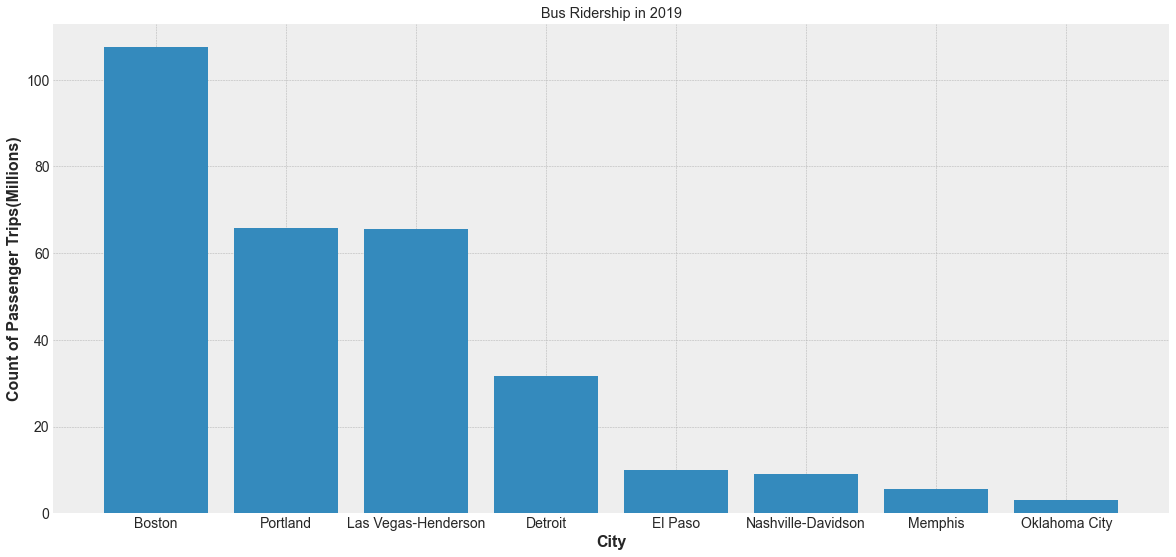

In [29]:
plt.style.use('bmh')
plt.figure(figsize=(20, 9))

plt.bar(
    bus_2019['City'],
    bus_2019['Count in Millions']
)

plt.xlabel("City", fontsize=16,fontweight='bold')
plt.ylabel("Count of Passenger Trips(Millions)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Bus Ridership in 2019');

In [30]:
total_ridership = j.groupby('City')[2019].sum()
total_ridership = pd.DataFrame(total_ridership).reset_index().rename(columns={2019: "Count of Unlinked Passenger Trip"})
total_ridership['Count in Millions'] = total_ridership['Count of Unlinked Passenger Trip']/1000000
total_ridership= total_ridership.sort_values(by='Count in Millions', ascending = False)
total_ridership

,City,Count of Unlinked Passenger Trip,Count in Millions
0,Boston,373619884,373.619884
7,Portland,114087759,114.087759
3,Las Vegas-Henderson,66921123,66.921123
1,Detroit,36101653,36.101653
2,El Paso,10473050,10.473050
5,Nashville-Davidson,10189012,10.189012
4,Memphis,6252830,6.252830
6,Oklahoma City,3466668,3.466668


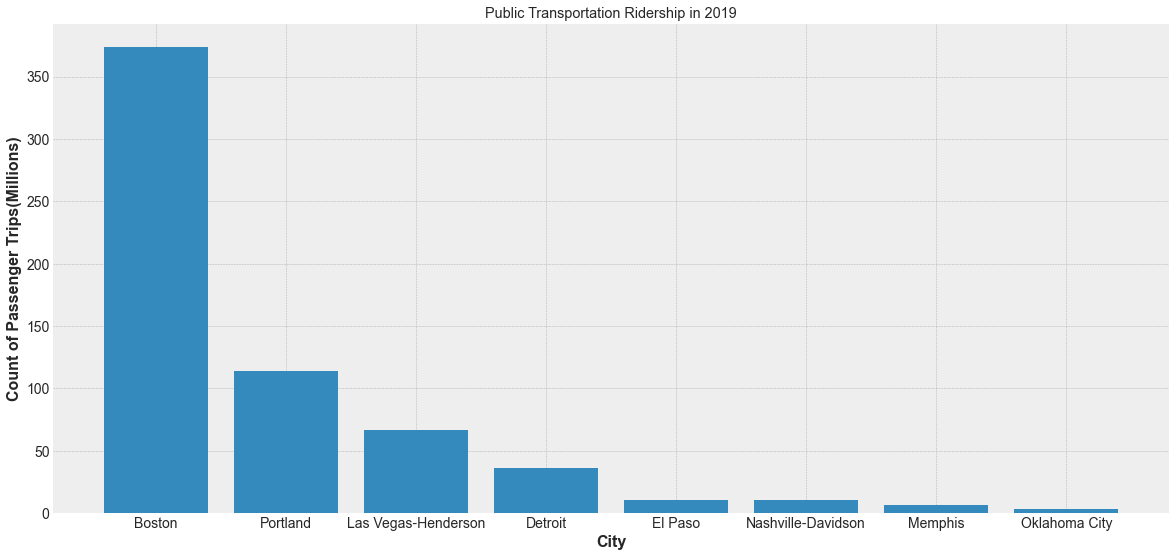

In [31]:
plt.style.use('bmh')
plt.figure(figsize=(20, 9))

plt.bar(
    total_ridership['City'],
    total_ridership['Count in Millions']
)

plt.xlabel("City", fontsize=16, fontweight='bold')
plt.ylabel("Count of Passenger Trips(Millions)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Public Transportation Ridership in 2019');

In [32]:
stacked = total_ridership.merge(bus_2019, on = 'City')
stacked

,City,Count of Unlinked Passenger Trip_x,Count in Millions_x,Count of Unlinked Passenger Trip_y,Count in Millions_y
0,Boston,373619884,373.619884,107505367,107.505367
1,Portland,114087759,114.087759,65906015,65.906015
2,Las Vegas-Henderson,66921123,66.921123,65528910,65.528910
3,Detroit,36101653,36.101653,31723408,31.723408
4,El Paso,10473050,10.473050,9873514,9.873514
5,Nashville-Davidson,10189012,10.189012,9118379,9.118379
6,Memphis,6252830,6.252830,5662651,5.662651
7,Oklahoma City,3466668,3.466668,3032413,3.032413


In [33]:
stacked = stacked[['City', 'Count in Millions_y','Count in Millions_x']]
stacked = stacked.rename(columns = {'Count in Millions_y': "Count of Bus Riders",'Count in Millions_x':'Total Ridership'})
stacked = stacked.sort_values(by='Total Ridership', ascending = False)
stacked

,City,Count of Bus Riders,Total Ridership
0,Boston,107.505367,373.619884
1,Portland,65.906015,114.087759
2,Las Vegas-Henderson,65.528910,66.921123
3,Detroit,31.723408,36.101653
4,El Paso,9.873514,10.473050
5,Nashville-Davidson,9.118379,10.189012
6,Memphis,5.662651,6.252830
7,Oklahoma City,3.032413,3.466668


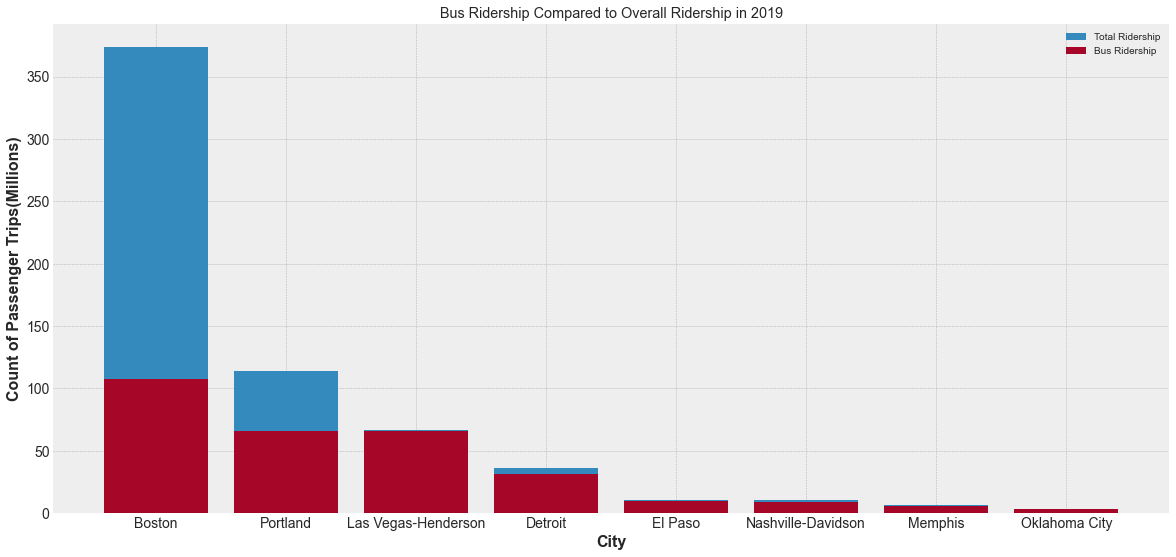

In [34]:
plt.style.use('bmh')
plt.figure(figsize=(20, 9))

plt.bar(
    stacked['City'],
    stacked['Total Ridership'],
    label = 'Total Ridership'
)

plt.bar(
    stacked['City'],
    stacked['Count of Bus Riders'],
    label = 'Bus Ridership'
)

plt.xlabel("City", fontsize=16, fontweight='bold')
plt.ylabel("Count of Passenger Trips(Millions)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.title('Bus Ridership Compared to Overall Ridership in 2019');

In [35]:
# Let's take a look into Boston

b = Boston.groupby('Name')[[2019]].sum().reset_index().rename(columns={2019:'Ridership'})
b['Count in Million'] = b['Ridership']/1000000
b = b.sort_values(by='Count in Million', ascending = False)
b

,Name,Ridership,Count in Million
5,heavy rail,159102449,159.102449
7,motor bus,107505367,107.505367
6,light rail,56383908,56.383908
2,commuter rail,31883589,31.883589
0,bus rapid transit,11626928,11.626928
8,trolleybus,3004461,3.004461
3,demand response,2417756,2.417756
4,ferryboats,1636006,1.636006
1,commuter bus,59420,0.059420


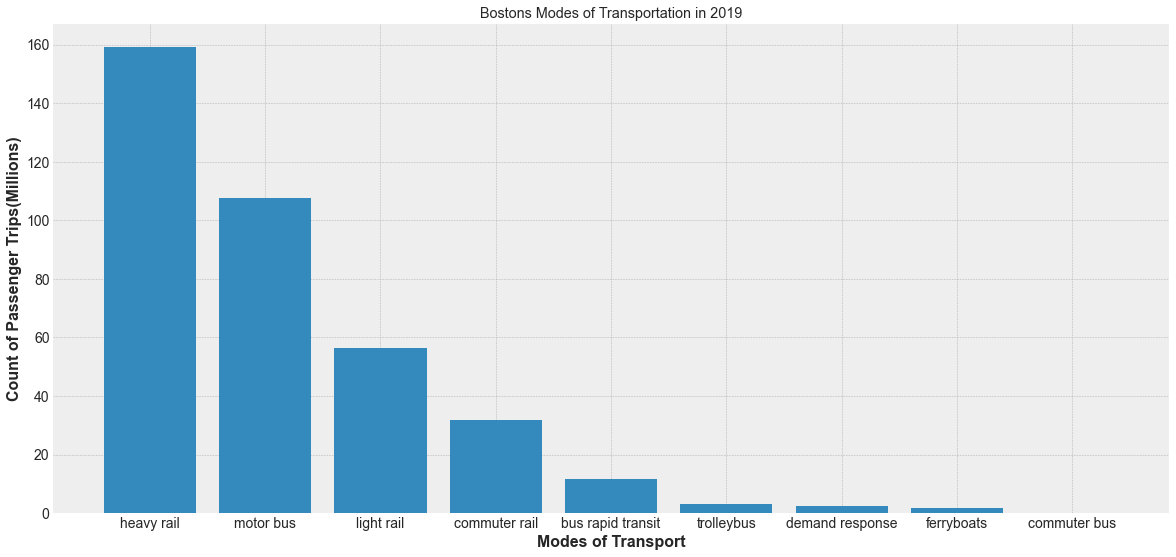

In [36]:
plt.style.use('bmh')
plt.figure(figsize=(20, 9))

plt.bar(
    b['Name'],
    b['Count in Million']
)

plt.xlabel("Modes of Transport", fontsize=16, fontweight='bold')
plt.ylabel("Count of Passenger Trips(Millions)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Bostons Modes of Transportation in 2019');

# I want to look at some of the financials

In [37]:
j['5 digit NTD ID'].value_counts()

10003    10
60017     8
8         7
90045     5
60006     5
40159     5
40004     5
40003     5
58        4
50031     4
10005     4
24        4
50119     4
376       3
10013     3
10118     2
46        2
10053     2
50213     2
50141     2
10016     2
10004     2
40247     1
10069     1
10088     1
50193     1
40178     1
10115     1
Name: 5 digit NTD ID, dtype: int64

In [38]:
# This data is for 2019

og_metric_df = pd.read_excel('../data/public transportation/Metrics_Static.xlsx', sheet_name = 'Metrics', nrows=3680)
og_metric_df

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?
0,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,10885,HR,...,NaN,2712521697,NaN,19430373,NaN,10462782577,NaN,354616371,NaN,No
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,10885,CB,...,NaN,11477164,NaN,616233,NaN,153389117,NaN,9866807,NaN,No
2,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,10885,MB,...,NaN,691616614,NaN,12215926,NaN,1478429570,NaN,86233591,NaN,No
3,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,10885,DR,...,NaN,4828423,NaN,3989579,NaN,43330163,NaN,37759280,NaN,No
4,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295,10885,RB,...,NaN,30695695,NaN,517519,NaN,57076245,NaN,3382426,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,Lane County Transportation,Dighton,KS,7R02-102,7R02-70197,"City, County or Local Government Unit or Depar...",Rural Reporter,0,1,DR,...,NaN,1166,NaN,160,NaN,0,NaN,6306,NaN,No
3676,Quileute Tribe Community Shuttle,La Push,WA,NaN,417,Tribe,Reduced Reporter,0,1,MB,...,NaN,1670,NaN,2087,NaN,0,NaN,46760,NaN,No
3677,Samish Indian Nation,Anacortes,WA,NaN,455,Tribe,Reduced Reporter,0,1,DR,...,NaN,30,NaN,10,NaN,0,NaN,262,NaN,No
3678,"City of Needles, dba: Needles Area Transit",Needles,CA,9R02-063,9R02-91020,"City, County or Local Government Unit or Depar...",Rural Reporter,0,1,MB,...,NaN,27623,NaN,3412,NaN,0,NaN,50028,NaN,No


In [39]:
g = og_metric_df

In [40]:
e = j['5 digit NTD ID']
e

145     10003
146     10003
147     10003
148     10003
149     10003
        ...  
996     40159
997     40159
998     40159
999     40159
1014    40178
Name: 5 digit NTD ID, Length: 96, dtype: int64

In [41]:
g = g[g['NTD ID'].isin(e)]
g

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?
34,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,1584440,NaN,24860,NaN,13942294,NaN,262174,NaN,No
35,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,MB,...,NaN,99301293,NaN,2721051,NaN,255494460,NaN,21357273,NaN,No
36,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,MB,...,NaN,951692,W,88210,NaN,2162081,W,1028451,NaN,Yes
37,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,DR,...,NaN,1862279,NaN,1417991,NaN,14589884,NaN,15610789,NaN,No
38,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,CR,...,NaN,31177738,NaN,829590,NaN,653570994,NaN,24935847,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,City of Portland,Portland,OR,58,58,"City, County or Local Government Unit or Depar...",Full Reporter,1849898,14,TR,...,NaN,2104368,NaN,3288,NaN,1346796,NaN,34294,NaN,No
2169,City of Portland,Portland,OR,58,58,"City, County or Local Government Unit or Depar...",Full Reporter,1849898,14,SR,...,NaN,4491362,NaN,68730,NaN,5845765,NaN,399542,NaN,No
2686,Detroit Transportation Corporation,Detroit,MI,5141,50141,Independent Public Agency or Authority of Tran...,Full Reporter,3734090,8,MG,...,NaN,1735852,NaN,42954,NaN,2395476,NaN,506223,NaN,No
3102,"M-1 Rail, dba: QLINE Detroit",Detroit,MI,5213,50213,Private-Non-Profit Corporation,Full Reporter,3734090,5,SR,...,NaN,1169213,NaN,27290,NaN,1796000,NaN,165463,NaN,No


In [42]:
f = j[['5 digit NTD ID','City']]
f

,5 digit NTD ID,City
145,10003,Boston
146,10003,Boston
147,10003,Boston
148,10003,Boston
149,10003,Boston
...,...,...
996,40159,Nashville-Davidson
997,40159,Nashville-Davidson
998,40159,Nashville-Davidson
999,40159,Nashville-Davidson


In [43]:
u = g.merge(f, how = 'left', left_on = 'NTD ID', right_on = '5 digit NTD ID')
u

,Agency,City_x,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,5 digit NTD ID,City_y
0,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,24860,NaN,13942294,NaN,262174,NaN,No,10003,Boston
1,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,24860,NaN,13942294,NaN,262174,NaN,No,10003,Boston
2,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,24860,NaN,13942294,NaN,262174,NaN,No,10003,Boston
3,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,24860,NaN,13942294,NaN,262174,NaN,No,10003,Boston
4,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,24860,NaN,13942294,NaN,262174,NaN,No,10003,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Detroit Transportation Corporation,Detroit,MI,5141,50141,Independent Public Agency or Authority of Tran...,Full Reporter,3734090,8,MG,...,NaN,42954,NaN,2395476,NaN,506223,NaN,No,50141,Detroit
337,Detroit Transportation Corporation,Detroit,MI,5141,50141,Independent Public Agency or Authority of Tran...,Full Reporter,3734090,8,MG,...,NaN,42954,NaN,2395476,NaN,506223,NaN,No,50141,Detroit
338,"M-1 Rail, dba: QLINE Detroit",Detroit,MI,5213,50213,Private-Non-Profit Corporation,Full Reporter,3734090,5,SR,...,NaN,27290,NaN,1796000,NaN,165463,NaN,No,50213,Detroit
339,"M-1 Rail, dba: QLINE Detroit",Detroit,MI,5213,50213,Private-Non-Profit Corporation,Full Reporter,3734090,5,SR,...,NaN,27290,NaN,1796000,NaN,165463,NaN,No,50213,Detroit


In [44]:
u = u[['Agency',
 'City_y',
 'State',
 'Legacy NTD ID',
 'NTD ID',
 'Organization Type',
 'Reporter Type',
 'Primary UZA\n Population',
 'Agency VOMS',
 'Mode',
 'TOS',
 'Mode VOMS',
 'Ratios:',
 'Fare Revenues per Unlinked Passenger Trip ',
 'Fare Revenues per Unlinked Passenger Trip Questionable',
 'Fare Revenues per Total Operating Expense (Recovery Ratio)',
 'Fare Revenues per Total Operating Expense (Recovery Ratio) Questionable',
 'Cost per\n Hour',
 'Cost per Hour Questionable',
 'Passengers per Hour',
 'Passengers per Hour Questionable',
 'Cost per Passenger',
 'Cost per Passenger Questionable',
 'Cost per Passenger Mile',
 'Cost per Passenger Mile Questionable',
 'Source Data:',
 'Fare Revenues Earned',
 'Fare Revenues Earned Questionable',
 'Total Operating Expenses',
 'Total Operating Expenses Questionable',
 'Unlinked Passenger Trips',
 'Unlinked Passenger Trips Questionable',
 'Vehicle Revenue Hours',
 'Vehicle Revenue Hours Questionable',
 'Passenger Miles',
 'Passenger Miles Questionable',
 'Vehicle Revenue Miles',
 'Vehicle Revenue Miles Questionable',
 'Any data questionable?']]
u = u.rename(columns = {'City_y':'City'})

In [45]:
u

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?
0,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,1584440,NaN,24860,NaN,13942294,NaN,262174,NaN,No
1,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,1584440,NaN,24860,NaN,13942294,NaN,262174,NaN,No
2,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,1584440,NaN,24860,NaN,13942294,NaN,262174,NaN,No
3,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,1584440,NaN,24860,NaN,13942294,NaN,262174,NaN,No
4,Massachusetts Bay Transportation Authority,Boston,MA,1003,10003,Independent Public Agency or Authority of Tran...,Full Reporter,4181019,2464,FB,...,NaN,1584440,NaN,24860,NaN,13942294,NaN,262174,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Detroit Transportation Corporation,Detroit,MI,5141,50141,Independent Public Agency or Authority of Tran...,Full Reporter,3734090,8,MG,...,NaN,1735852,NaN,42954,NaN,2395476,NaN,506223,NaN,No
337,Detroit Transportation Corporation,Detroit,MI,5141,50141,Independent Public Agency or Authority of Tran...,Full Reporter,3734090,8,MG,...,NaN,1735852,NaN,42954,NaN,2395476,NaN,506223,NaN,No
338,"M-1 Rail, dba: QLINE Detroit",Detroit,MI,5213,50213,Private-Non-Profit Corporation,Full Reporter,3734090,5,SR,...,NaN,1169213,NaN,27290,NaN,1796000,NaN,165463,NaN,No
339,"M-1 Rail, dba: QLINE Detroit",Detroit,MI,5213,50213,Private-Non-Profit Corporation,Full Reporter,3734090,5,SR,...,NaN,1169213,NaN,27290,NaN,1796000,NaN,165463,NaN,No


In [46]:
fares = u.groupby(['City'])['Fare Revenues Earned'].sum()
fares = pd.DataFrame(fares).reset_index()
fares['In Millions'] = fares['Fare Revenues Earned']/1000000
fares = fares.sort_values(by = 'In Millions', ascending = False)
fares

,City,Fare Revenues Earned,In Millions
0,Boston,6736179315,6736.179315
7,Portland,859162895,859.162895
3,Las Vegas-Henderson,335718730,335.718730
1,Detroit,132808048,132.808048
5,Nashville-Davidson,50053869,50.053869
2,El Paso,39884375,39.884375
4,Memphis,30987559,30.987559
6,Oklahoma City,21105072,21.105072


In [47]:
expenses = u.groupby(['City'])['Total Operating Expenses'].sum()
expenses = pd.DataFrame(expenses).reset_index()
expenses['In Millions'] = expenses['Total Operating Expenses']/1000000
expenses = expenses.sort_values(by = 'In Millions', ascending = False)
expenses

,City,Total Operating Expenses,In Millions
0,Boston,15219699986,15219.699986
7,Portland,4044795195,4044.795195
3,Las Vegas-Henderson,1187377560,1187.377560
1,Detroit,955648026,955.648026
5,Nashville-Davidson,452878244,452.878244
2,El Paso,326241895,326.241895
4,Memphis,291847881,291.847881
6,Oklahoma City,248931472,248.931472


In [48]:
fe = fares.merge(expenses, on = 'City')
fe = fe.rename(columns = {'In Millions_x':'Renenues in Millions', 'In Millions_y':'Expenses in Millions'})
fe

,City,Fare Revenues Earned,Renenues in Millions,Total Operating Expenses,Expenses in Millions
0,Boston,6736179315,6736.179315,15219699986,15219.699986
1,Portland,859162895,859.162895,4044795195,4044.795195
2,Las Vegas-Henderson,335718730,335.718730,1187377560,1187.377560
3,Detroit,132808048,132.808048,955648026,955.648026
4,Nashville-Davidson,50053869,50.053869,452878244,452.878244
5,El Paso,39884375,39.884375,326241895,326.241895
6,Memphis,30987559,30.987559,291847881,291.847881
7,Oklahoma City,21105072,21.105072,248931472,248.931472


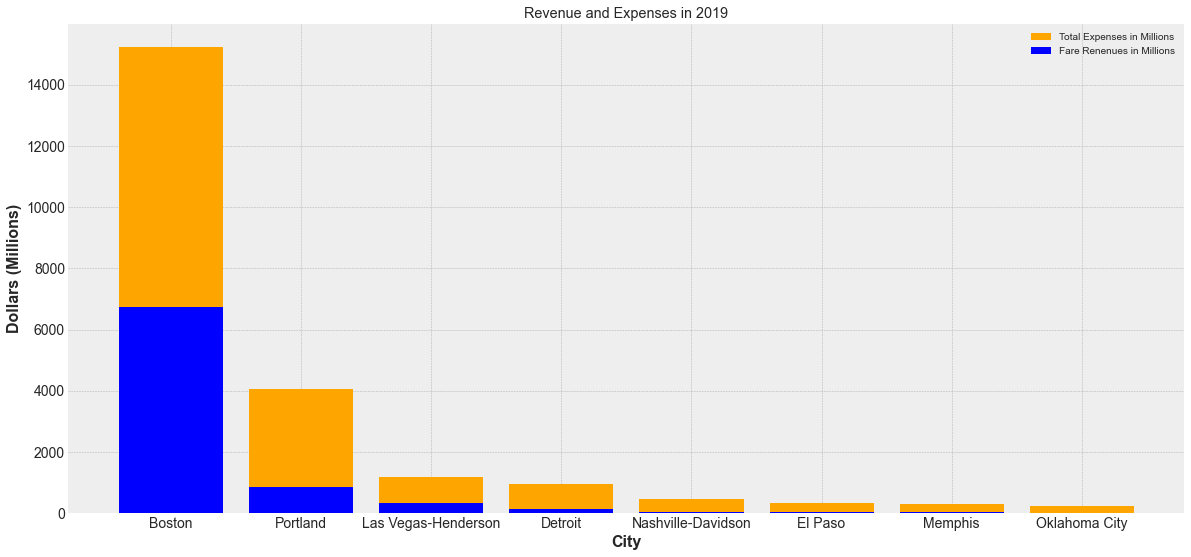

In [49]:
plt.style.use('bmh')
plt.figure(figsize=(20, 9))

plt.bar(
    fe['City'],
    fe['Expenses in Millions'],
    label = 'Total Expenses in Millions',
    color = 'orange'
)

plt.bar(
    fe['City'],
    fe['Renenues in Millions'],
    label = 'Fare Renenues in Millions',
    color = 'blue'
)

plt.xlabel("City", fontsize=16, fontweight='bold')
plt.ylabel("Dollars (Millions)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.title('Revenue and Expenses in 2019');

In [50]:
i = j.groupby(['City','Name'])[2019].sum()
city_modes = pd.DataFrame(i)
city_modes = city_modes.reset_index()
city_modes = city_modes.rename(columns = {2019:'Count of Passenger Trips'}).sort_values(by = ['City','Count of Passenger Trips'], ascending = False)
city_modes

,City,Name,Count of Passenger Trips
45,Portland,motor bus,65906015
44,Portland,light rail,38388070
46,Portland,streetcar,4097594
38,Portland,aerial tramway,2202197
41,Portland,demand response,1412272
42,Portland,ferryboats,1104433
40,Portland,commuter rail,574692
43,Portland,hybrid rail,361612
47,Portland,vanpool,40874
39,Portland,commuter bus,0


In [51]:
nash_2050

,CITY,STATE,POPESTIMATE2020
0,Jacksonville,Florida,920570
1,Indianapolis (balance),Indiana,877903
2,Charlotte,North Carolina,900350
3,Columbus,Ohio,903852
4,Fort Worth,Texas,927720


In [52]:
Denver = year_upt_df.loc[year_upt_df['City'].str.contains("Denver")]
Washington = year_upt_df.loc[year_upt_df['City'].str.contains("Washington")]
Seattle = year_upt_df.loc[year_upt_df['City'].str.contains("Seattle")]
San_Francisco = year_upt_df.loc[year_upt_df['City'].str.contains("San Francisco")]
Jacksonville = year_upt_df.loc[year_upt_df['City'].str.contains("Jacksonville")]
Indianapolis = year_upt_df.loc[year_upt_df['City'].str.contains("Indianapolis")]
Columbus = year_upt_df.loc[year_upt_df['City'].str.contains("Columbus")]
Fort_Worth = year_upt_df.loc[year_upt_df['City'].str.contains("Fort Worth")]


In [53]:
smash = pd.concat([Denver, Washington,Seattle,San_Francisco,Jacksonville,Indianapolis,Columbus, Fort_Worth,nash_transport])
smash

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,City,State,Modes,Name,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021 Through April
1772,80006,8006,Denver Regional Transportation District,Active,Full Reporter,18,Denver-Aurora,CO,CR,commuter rail,...,0,0,0,0,0,0,0,0,173765,178234
1773,80006,8006,Denver Regional Transportation District,Active,Full Reporter,18,Denver-Aurora,CO,CR,commuter rail,...,0,0,0,0,4317405,6950256,7619589,9711377,4780402,1408183
1774,80006,8006,Denver Regional Transportation District,Active,Full Reporter,18,Denver-Aurora,CO,DR,demand response,...,38680,55968,20406,0,0,0,0,0,0,0
1775,80006,8006,Denver Regional Transportation District,Active,Full Reporter,18,Denver-Aurora,CO,DR,demand response,...,1124141,1174258,1250054,1229366,1185958,1215468,1226319,1179015,541749,161009
1776,80006,8006,Denver Regional Transportation District,Active,Full Reporter,18,Denver-Aurora,CO,LR,light rail,...,20639068,23773843,26363053,25518578,24585082,24645459,25322058,24585300,10464678,2332225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,Nashville-Davidson,TN,CR,commuter rail,...,264874,243496,258023,273878,283174,299112,298765,293314,77245,11087
997,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,Nashville-Davidson,TN,MB,motor bus,...,0,0,0,0,0,0,0,0,0,0
998,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,Nashville-Davidson,TN,VP,vanpool,...,0,0,0,0,0,0,0,0,0,0
999,40159,4159,Regional Transportation Authority,Active,Full Reporter,44,Nashville-Davidson,TN,VP,vanpool,...,185159,173843,176851,153928,136367,125245,119671,75901,35894,4380


In [54]:
s = smash.groupby('City')[2019].sum()
s = pd.DataFrame(s).reset_index().rename(columns = {2019: 'Count of Passenger Trip'})
s['Count in Millions'] = s['Count of Passenger Trip']/1000000
s = s.sort_values(by = 'Count in Millions', ascending = False)
s['City'] = s['City'].str.replace('Dallas-Fort Worth-Arlington','Dallas-Fort')
s

,City,Count of Passenger Trip,Count in Millions
6,San Francisco-Oakland,444902197,444.902197
8,Washington,420971676,420.971676
7,Seattle,224989946,224.989946
2,Denver-Aurora,105375108,105.375108
1,Dallas-Fort,76670186,76.670186
0,Columbus,19572009,19.572009
4,Jacksonville,11458624,11.458624
5,Nashville-Davidson,10189012,10.189012
3,Indianapolis,9701062,9.701062


In [55]:
m = smash['5 digit NTD ID']
n = og_metric_df
m = n[n['NTD ID'].isin(m)]
m

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?
19,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,1206050,NaN,57911,NaN,9025834,NaN,901961,NaN,No
20,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,HR,...,NaN,228974810,NaN,3667616,NaN,1313511151,NaN,85106645,NaN,No
21,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,DR,...,NaN,2212686,NaN,2122506,NaN,21875322,NaN,19685883,NaN,No
22,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,DT,...,NaN,135638,NaN,91841,NaN,2502448,NaN,2283499,NaN,No
23,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,122127065,NaN,3726938,NaN,358532948,NaN,36511319,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,"City of Seattle, dba: Seattle Center Monorail",Seattle,WA,23,23,"City, County or Local Government Unit or Depar...",Full Reporter,3059393,8,MG,...,NaN,1939224,NaN,20041,NaN,1745302,NaN,195517,NaN,No
2722,"City of Grand Prairie , dba: Grand Connection",Grand Prairie,TX,6068,60068,"City, County or Local Government Unit or Depar...",Reduced Reporter,5121892,8,DR,...,NaN,53404,NaN,13057,NaN,0,NaN,140835,NaN,No
2731,"City of Fairfax, dba: CUE Bus",Fairfax,VA,3058,30058,"City, County or Local Government Unit or Depar...",Full Reporter,4586770,8,MB,...,NaN,601813,NaN,34273,NaN,2040146,NaN,435847,NaN,No
3058,McKinney Avenue Transit Authority,Dallas,TX,6133,60133,Private-Non-Profit Corporation,Full Reporter,5121892,5,SR,...,NaN,571801,NaN,12995,NaN,721986,NaN,61459,NaN,No


In [56]:
b = smash[['5 digit NTD ID','City']]
m = m.merge(b, how = 'left', left_on = 'NTD ID', right_on = '5 digit NTD ID')
m

,Agency,City_x,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,5 digit NTD ID,City_y
0,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,57911,NaN,9025834,NaN,901961,NaN,No,30030,Washington
1,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,57911,NaN,9025834,NaN,901961,NaN,No,30030,Washington
2,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,57911,NaN,9025834,NaN,901961,NaN,No,30030,Washington
3,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,57911,NaN,9025834,NaN,901961,NaN,No,30030,Washington
4,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,57911,NaN,9025834,NaN,901961,NaN,No,30030,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,"City of Seattle, dba: Seattle Center Monorail",Seattle,WA,23,23,"City, County or Local Government Unit or Depar...",Full Reporter,3059393,8,MG,...,NaN,20041,NaN,1745302,NaN,195517,NaN,No,23,Seattle
681,"City of Grand Prairie , dba: Grand Connection",Grand Prairie,TX,6068,60068,"City, County or Local Government Unit or Depar...",Reduced Reporter,5121892,8,DR,...,NaN,13057,NaN,0,NaN,140835,NaN,No,60068,Dallas-Fort Worth-Arlington
682,"City of Fairfax, dba: CUE Bus",Fairfax,VA,3058,30058,"City, County or Local Government Unit or Depar...",Full Reporter,4586770,8,MB,...,NaN,34273,NaN,2040146,NaN,435847,NaN,No,30058,Washington
683,McKinney Avenue Transit Authority,Dallas,TX,6133,60133,Private-Non-Profit Corporation,Full Reporter,5121892,5,SR,...,NaN,12995,NaN,721986,NaN,61459,NaN,No,60133,Dallas-Fort Worth-Arlington


In [57]:
list(m)
m = m[['Agency',
 'City_y',
 'State',
 'Legacy NTD ID',
 'NTD ID',
 'Organization Type',
 'Reporter Type',
 'Primary UZA\n Population',
 'Agency VOMS',
 'Mode',
 'TOS',
 'Mode VOMS',
 'Ratios:',
 'Fare Revenues per Unlinked Passenger Trip ',
 'Fare Revenues per Unlinked Passenger Trip Questionable',
 'Fare Revenues per Total Operating Expense (Recovery Ratio)',
 'Fare Revenues per Total Operating Expense (Recovery Ratio) Questionable',
 'Cost per\n Hour',
 'Cost per Hour Questionable',
 'Passengers per Hour',
 'Passengers per Hour Questionable',
 'Cost per Passenger',
 'Cost per Passenger Questionable',
 'Cost per Passenger Mile',
 'Cost per Passenger Mile Questionable',
 'Source Data:',
 'Fare Revenues Earned',
 'Fare Revenues Earned Questionable',
 'Total Operating Expenses',
 'Total Operating Expenses Questionable',
 'Unlinked Passenger Trips',
 'Unlinked Passenger Trips Questionable',
 'Vehicle Revenue Hours',
 'Vehicle Revenue Hours Questionable',
 'Passenger Miles',
 'Passenger Miles Questionable',
 'Vehicle Revenue Miles',
 'Vehicle Revenue Miles Questionable',
 'Any data questionable?']]

In [58]:
m = m.rename(columns = {'City_y':'City'})
m

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?
0,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,1206050,NaN,57911,NaN,9025834,NaN,901961,NaN,No
1,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,1206050,NaN,57911,NaN,9025834,NaN,901961,NaN,No
2,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,1206050,NaN,57911,NaN,9025834,NaN,901961,NaN,No
3,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,1206050,NaN,57911,NaN,9025834,NaN,901961,NaN,No
4,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770,3391,MB,...,NaN,1206050,NaN,57911,NaN,9025834,NaN,901961,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,"City of Seattle, dba: Seattle Center Monorail",Seattle,WA,23,23,"City, County or Local Government Unit or Depar...",Full Reporter,3059393,8,MG,...,NaN,1939224,NaN,20041,NaN,1745302,NaN,195517,NaN,No
681,"City of Grand Prairie , dba: Grand Connection",Dallas-Fort Worth-Arlington,TX,6068,60068,"City, County or Local Government Unit or Depar...",Reduced Reporter,5121892,8,DR,...,NaN,53404,NaN,13057,NaN,0,NaN,140835,NaN,No
682,"City of Fairfax, dba: CUE Bus",Washington,VA,3058,30058,"City, County or Local Government Unit or Depar...",Full Reporter,4586770,8,MB,...,NaN,601813,NaN,34273,NaN,2040146,NaN,435847,NaN,No
683,McKinney Avenue Transit Authority,Dallas-Fort Worth-Arlington,TX,6133,60133,Private-Non-Profit Corporation,Full Reporter,5121892,5,SR,...,NaN,571801,NaN,12995,NaN,721986,NaN,61459,NaN,No


In [59]:
ffares = m.groupby('City')['Fare Revenues Earned'].sum()
ffares = pd.DataFrame(ffares).reset_index()
ffares['Count in Millions'] = ffares['Fare Revenues Earned']/1000000
ffares = ffares.sort_values(by = 'Count in Millions', ascending = False)
ffares

,City,Fare Revenues Earned,Count in Millions
6,San Francisco-Oakland,4188612606,4188.612606
8,Washington,3689083273,3689.083273
7,Seattle,2777495330,2777.495330
2,Denver-Aurora,1235894775,1235.894775
1,Dallas-Fort Worth-Arlington,726250961,726.250961
4,Jacksonville,98625768,98.625768
3,Indianapolis,65513182,65.513182
5,Nashville-Davidson,50053869,50.053869
0,Columbus,41479502,41.479502


In [60]:
eexpenses = m.groupby('City')['Total Operating Expenses'].sum()
eexpenses = pd.DataFrame(eexpenses).reset_index()
eexpenses['Count in Millions'] = eexpenses['Total Operating Expenses']/1000000
eexpenses = eexpenses.sort_values(by = 'Count in Millions', ascending = False)
eexpenses

,City,Total Operating Expenses,Count in Millions
6,San Francisco-Oakland,13041274445,13041.274445
7,Seattle,11689650422,11689.650422
8,Washington,11542455098,11542.455098
1,Dallas-Fort Worth-Arlington,6252109959,6252.109959
2,Denver-Aurora,5155766968,5155.766968
4,Jacksonville,909267784,909.267784
3,Indianapolis,669204941,669.204941
5,Nashville-Davidson,452878244,452.878244
0,Columbus,353333701,353.333701


In [61]:
ffe = ffares.merge(eexpenses, on = 'City')
ffe = ffe.rename(columns = {'Count in Millions_x':'Renenues in Millions', 'Count in Millions_y':'Expenses in Millions'})
ffe['City'] = ffe['City'].str.replace('Dallas-Fort Worth-Arlington','Dallas-Fort')

In [62]:
ffe

,City,Fare Revenues Earned,Renenues in Millions,Total Operating Expenses,Expenses in Millions
0,San Francisco-Oakland,4188612606,4188.612606,13041274445,13041.274445
1,Washington,3689083273,3689.083273,11542455098,11542.455098
2,Seattle,2777495330,2777.495330,11689650422,11689.650422
3,Denver-Aurora,1235894775,1235.894775,5155766968,5155.766968
4,Dallas-Fort,726250961,726.250961,6252109959,6252.109959
5,Jacksonville,98625768,98.625768,909267784,909.267784
6,Indianapolis,65513182,65.513182,669204941,669.204941
7,Nashville-Davidson,50053869,50.053869,452878244,452.878244
8,Columbus,41479502,41.479502,353333701,353.333701


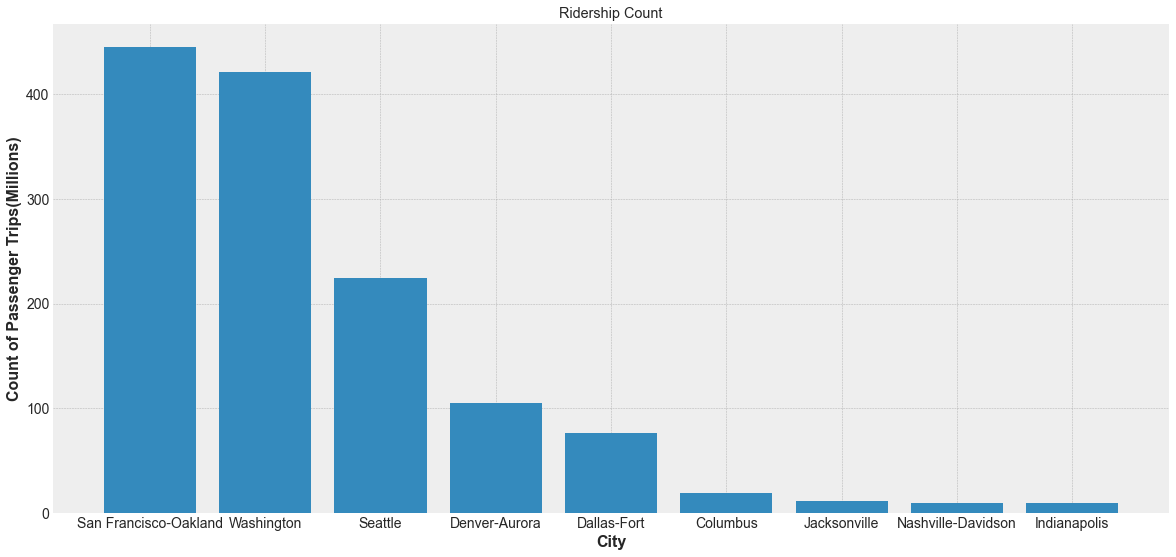

In [63]:
plt.style.use('bmh')
plt.figure(figsize=(20, 9))

plt.bar(
    s['City'],
    s['Count in Millions']
)

plt.xlabel("City", fontsize=16, fontweight='bold')
plt.ylabel("Count of Passenger Trips(Millions)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Ridership Count');

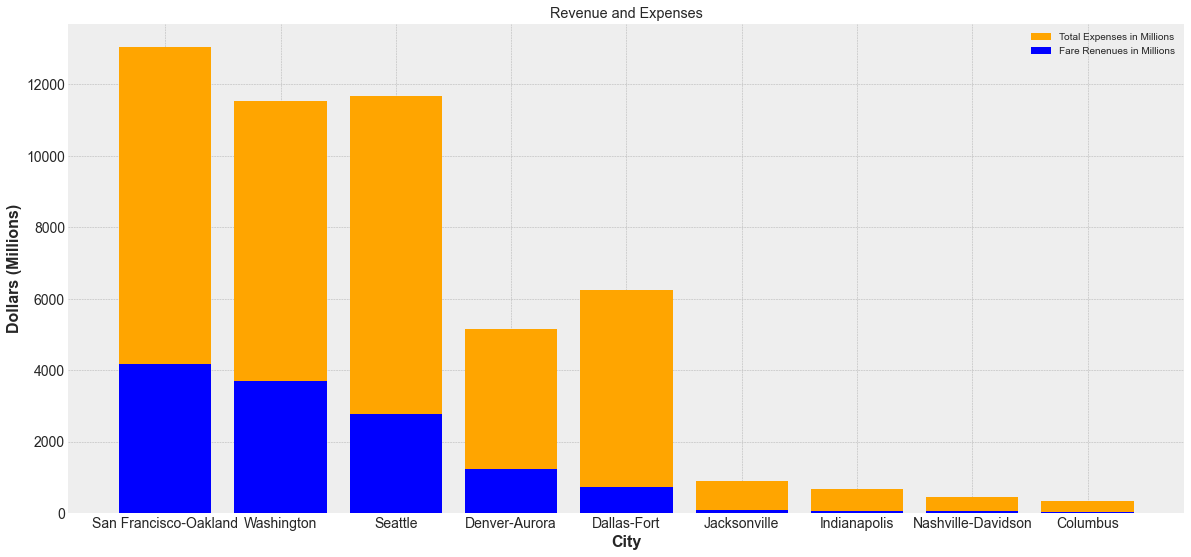

In [64]:
plt.style.use('bmh')
plt.figure(figsize=(20, 9))

plt.bar(
    ffe['City'],
    ffe['Expenses in Millions'],
    label = 'Total Expenses in Millions',
    color = 'orange'
)

plt.bar(
    ffe['City'],
    ffe['Renenues in Millions'],
    label = 'Fare Renenues in Millions',
    color = 'blue'
)

plt.xlabel("City", fontsize=16, fontweight='bold')
plt.ylabel("Dollars (Millions)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.title('Revenue and Expenses');

In [65]:
year_upt_df.to_csv(r'../data/public transportation/year_upt.csv', index = False)